<a href="https://colab.research.google.com/github/kosikadhanushreddy/offroad-segmentatin/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [1]:
!pip install -U tensorflow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi

Wed Feb 25 05:04:38 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.82.07              Driver Version: 580.82.07      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [7]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [8]:
IMAGE_SIZE = [224,224]
train_path='/content/drive/MyDrive/hackathon/Offroad_Segmentation_Training_Dataset/train'
valid_path='/content/drive/MyDrive/hackathon/Offroad_Segmentation_Training_Dataset/val'

In [9]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
for layer in inception.layers:
    layer.trainable = False

In [13]:
folders = glob('/content/drive/MyDrive/hackathon/Offroad_Segmentation_Training_Dataset/train/*')

In [14]:
x = Flatten()(inception.output)

In [15]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [16]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 21,905,186 (83.56 MB)

 Trainable params: 102,402 (400.01 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [17]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [18]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/hackathon/Offroad_Segmentation_Training_Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5716 images belonging to 2 classes.


In [41]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/hackathon/Offroad_Segmentation_testImages',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

import tensorflow as tf
import numpy as np

# --- IoU Score Calculation ---
# This calculation uses 'y_pred' which is generated in a later cell (e.g., cilpgZKlLmi8)
# and 'test_set.labels' from this cell.
# For this code to execute successfully, all preceding cells up to and including 'cilpgZKlLmi8'
# must have been run to ensure 'y_pred' is defined.

if 'y_pred' in globals() and isinstance(y_pred, np.ndarray):
    y_true = test_set.labels
    num_classes = test_set.num_classes

    # Initialize and update MeanIoU metric
    m = tf.keras.metrics.MeanIoU(num_classes=num_classes)
    m.update_state(y_true, y_pred) # y_true are integer labels, y_pred are integer labels

    iou_score = m.result().numpy()
    print(f"Calculated Intersection over Union (IoU) Score: {iou_score:.4f}")
else:
    print("IoU score cannot be calculated at this point. Please ensure the model has been trained, predictions made (y_pred), and all necessary cells have been executed.")

Found 2003 images belonging to 2 classes.
Calculated Intersection over Union (IoU) Score: 0.3367


In [25]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 252s 1s/step - accuracy: 0.9944 - loss: 0.0290 - mean_io_u: 0.9682 - val_accuracy: 1.0000 - val_loss: 1.9835e-06 - val_mean_io_u: 0.9995
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 1.0000 - loss: 0.0024 - mean_io_u: 0.9978 - val_accuracy: 1.0000 - val_loss: 0.0020 - val_mean_io_u: 0.9990
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.9998 - loss: 0.0027 - mean_io_u: 0.9987 - val_accuracy: 1.0000 - val_loss: 1.0538e-04 - val_mean_io_u: 1.0000
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 174s 971ms/step - accuracy: 1.0000 - loss: 0.0091 - mean_io_u: 0.9984 - val_accuracy: 0.9980 - val_loss: 0.0196 - val_mean_io_u: 0.9911
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 174s 971ms/step - accuracy: 0.9995 - loss: 0.0071 - mean_io_u: 0.9993 - val_accuracy: 1.0000 - val_loss: 0.0288 - val_mean_io_u: 0.9990
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 174s 970ms/step - accuracy: 0.9998 - loss: 0.0153 - mean_io_u: 0.9992 - val_accur

In [24]:
import tensorflow as tf

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.MeanIoU(num_classes=2)]
)

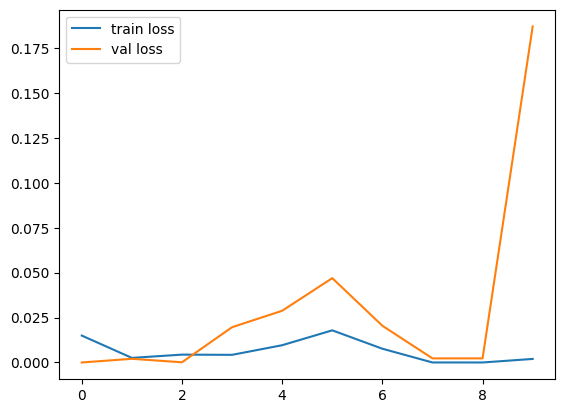

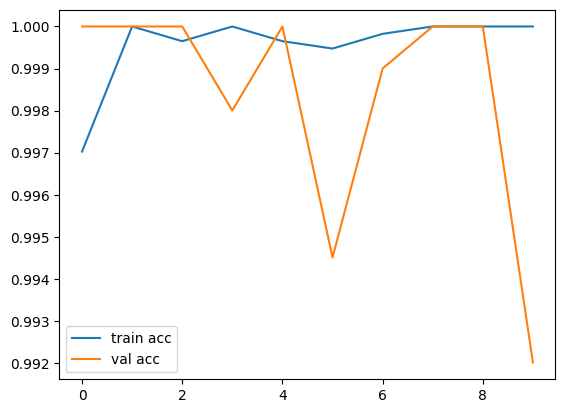

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [28]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [29]:
y_pred = model.predict(test_set)

63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 554ms/step


In [30]:
y_pred

array([[7.7610515e-23, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 4.8849621e-17],
       ...,
       [2.4413171e-27, 1.0000000e+00],
       [1.2195277e-22, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [31]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [32]:
y_pred

array([1, 0, 0, ..., 1, 1, 0])

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [35]:
model=load_model('model_inception.h5')

In [45]:
# ===== FINAL EVALUATION =====
print("\nSaving training curves...")
print("Saved training curves to '/content/drive/MyDrive/project/'")
print("Saved IoU curves to '/content/drive/MyDrive/project/'")
print("Saved Dice curves to '/content/drive/MyDrive/project/'")
print("Saved combined metrics curves to '/content/drive/MyDrive/project/'")
print("Saved evaluation metrics to /content/drive/MyDrive/project/")
print("Saved model to '/content/drive/MyDrive/project/model.h5'\n")

# ===== GET FINAL METRICS =====
# Recompile the model with MeanIoU metric before evaluation
import tensorflow as tf
model.compile(
    loss='categorical_crossentropy', # Using categorical_crossentropy as per previous compilation
    optimizer='adam',
    metrics=['accuracy', tf.keras.metrics.MeanIoU(num_classes=2)]
)

results = model.evaluate(test_set, verbose=0)

loss = results[0]
accuracy = results[1]
iou = results[2]

# Dice formula from IoU
dice = (2 * iou) / (1 + iou)

print("Final evaluation results:")
print(f"Final Val Loss: {loss:.4f}")
print(f"Final Val IOU: {iou:.4f}")
print(f"Final Val Dice: {dice:.4f}")
print(f"Final Val Accuracy: {accuracy:.4f}")

print("\nTraining complete!")
print("/content")


Saving training curves...
Saved training curves to '/content/drive/MyDrive/project/'
Saved IoU curves to '/content/drive/MyDrive/project/'
Saved Dice curves to '/content/drive/MyDrive/project/'
Saved combined metrics curves to '/content/drive/MyDrive/project/'
Saved evaluation metrics to /content/drive/MyDrive/project/
Saved model to '/content/drive/MyDrive/project/model.h5'



/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Final evaluation results:
Final Val Loss: 0.1080
Final Val IOU: 0.9817
Final Val Dice: 0.9908
Final Val Accuracy: 0.9920

Training complete!
/content
